In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting library with python
from sklearn.linear_model import LinearRegression # Library for linear regression model
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/labels.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/labels.csv
/kaggle/input/description.md
/kaggle/input/GCP-Coupons-Instructions.rtf
/kaggle/input/sample_submission.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv
/kaggle/input/new-york-city-taxi-fare-prediction/description.md
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv.zip


In [3]:
# წავიკითხოთ მონაცემები pandas dataframe, ლიმიტი 10,000,000 მონაცემია
train_data_set =  pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_000, parse_dates=["pickup_datetime"])

# დავბეჭდოთ პირველი 5 ერთეული მონაცემებიდან
train_data_set.head(5)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
print(train_data_set.dtypes)
train_data_set.describe()


key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [5]:
old_len = len(train_data_set)
train_data_set = train_data_set[train_data_set.fare_amount>=0.1]
new_len = len(train_data_set)
print(f"Removed {(old_len-new_len)} entities from the dataset")
train_data_set.describe()


Removed 790 entities from the dataset


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999210e+06,9.999210e+06,9.999210e+06,9.999141e+06,9.999141e+06,9.999210e+06
mean,1.133983e+01,-7.250800e+01,3.991947e+01,-7.250947e+01,3.991941e+01,1.684799e+00
std,9.798677e+00,1.299373e+01,9.322485e+00,1.287413e+01,9.236926e+00,1.323430e+00
min,1.000000e-01,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [6]:
old_len = len(train_data_set)
train_data_set = train_data_set.dropna(how = 'any', axis = 'rows')
new_len = len(train_data_set)
print(f"Removed {(old_len-new_len)} entities from the dataset")


Removed 69 entities from the dataset


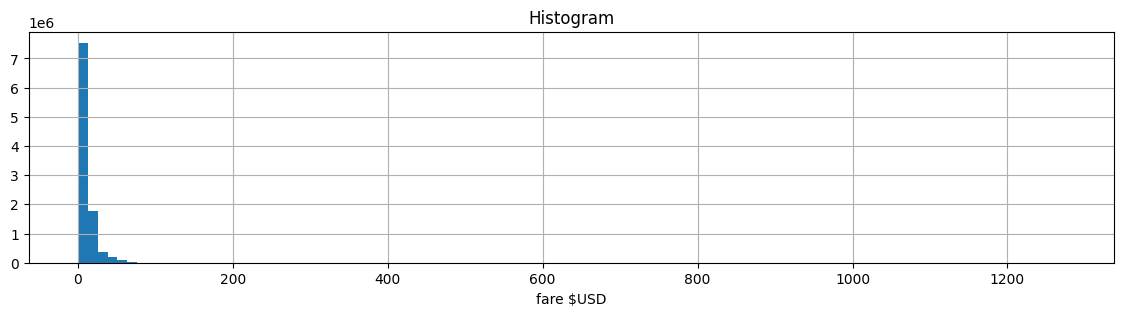

In [7]:
train_data_set.fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');


In [8]:
# helper მეთოდი რომ ავირჩიოთ ყველა მონაცემი საზღვრებში
def select_within_boundingbox(df, box):
    return (df.pickup_longitude >= box[0]) & (df.pickup_longitude  box[1]) & \
           (df.pickup_latitude >= box[2]) & (df.pickup_latitude  box[3]) & \
           (df.dropoff_longitude >= box[0]) & (df.dropoff_longitude  box[1]) & \
           (df.dropoff_latitude >= box[2]) & (df.dropoff_latitude  box[3])

# ნიუ იორკის საზღვრები
new_york_box = (-74.763379, -72.856164, 40.502009, 41.915509)

old_len = len(train_data_set)
train_data_set = train_data_set[select_within_boundingbox(train_data_set, new_york_box)]
new_len = len(train_data_set)
print(f"Removed {(old_len-new_len)} entities from the dataset")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3707414306.py, line 3)

In [9]:
def distance_on_the_sphere(lat1, lon1, lat2, lon2):
    earth_radius = 6371 # დედამიწის რადიუსი კილომეტრებში
    # კუთხეები გვჭირდება რადიანებში
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2.0) * np.sin(delta_phi / 2.0) + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) * np.sin(delta_lambda / 2.0)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return earth_radius * c

# ჩავამატოთ distance feature ჩვენს მონაცემებში
train_data_set['distance'] = distance_on_the_sphere(train_data_set['pickup_latitude'], train_data_set['pickup_longitude'],
                                          train_data_set['dropoff_latitude'], train_data_set['dropoff_longitude'])

train_data_set.head(5)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [10]:
train_data_set['pickup_datetime'] = pd.to_datetime(train_data_set['pickup_datetime'])
train_data_set['hour'] = train_data_set['pickup_datetime'].dt.hour
train_data_set['year'] = train_data_set['pickup_datetime'].dt.year
train_data_set['day_of_week'] = train_data_set['pickup_datetime'].dt.dayofweek
train_data_set['is_rush_hour'] = train_data_set['hour'].apply(lambda x: 1 if x >= 7 and x  10 or x >= 16 and x  19 else 0)

train_data_set.head(5)


SyntaxError: expected 'else' after 'if' expression (3278912465.py, line 5)

In [11]:
nyc_down_town = (-74.0063889, 40.7141667)

train_data_set['distance_to_downtown'] = distance_on_the_sphere(nyc_down_town[1], nyc_down_town[0], train_data_set.pickup_latitude, train_data_set.pickup_longitude)

train_data_set.head(5)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_to_downtown
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,13.682770
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,0.874172
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,5.603895
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.662028
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,6.800820


In [12]:
idx = train_data_set.passenger_count != 0 & (train_data_set.distance_to_downtown15)

features = ['hour', 'year', 'distance', 'passenger_count']
target = 'fare_amount'

X = train_data_set[idx][features].values
y = train_data_set[idx][target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


AttributeError: 'DataFrame' object has no attribute 'distance_to_downtown15'

In [13]:
test_data_set =  pd.read_csv('../input/new-york-city-taxi-fare-prediction/test.csv')
test_data_set['distance'] = distance_on_the_sphere(test_data_set['pickup_latitude'], test_data_set['pickup_longitude'],
                                          test_data_set['dropoff_latitude'], test_data_set['dropoff_longitude'])
test_data_set['distance_to_downtown'] = distance_on_the_sphere(nyc_down_town[1], nyc_down_town[0], test_data_set.pickup_latitude, test_data_set.pickup_longitude)
test_data_set['pickup_datetime'] = pd.to_datetime(test_data_set['pickup_datetime'])
test_data_set['hour'] = test_data_set['pickup_datetime'].dt.hour
test_data_set['year'] = test_data_set['pickup_datetime'].dt.year


In [14]:
filename = './output/baseline_linear'

XTEST = test_data_set[features].values

y_pred_final = linear_model.predict(XTEST)

submission = pd.DataFrame(
    {'key': test_data_set.key, 'fare_amount': y_pred_final},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)


NameError: name 'features' is not defined